# Calculate statistics of the dataset

Plot a histogram, count the total points, and calculate the mean, median, and variance. Useful for understanding the distribution of the data before funneling into an ML model and analyzing.

---

### 1. Load packages and open dataset

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
point_name = 'upstream' # 'upstream', 'middle', or 'terminus'
data = pd.read_csv('../data/clean/' + point_name + '_velocity_series_clean.csv')

### Plot histogram of data points
This plot displays the number of velocity data points for each year in the dataset

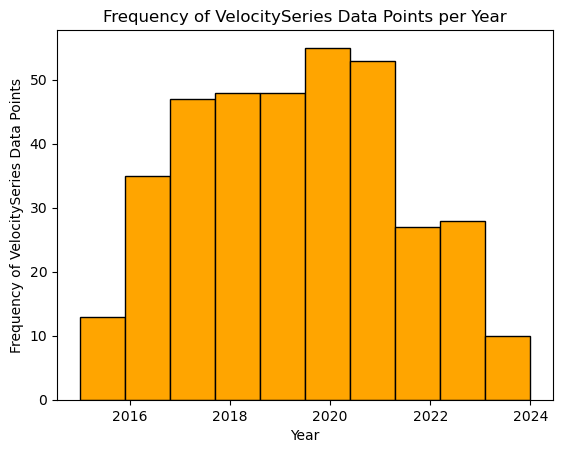

In [9]:
# Convert 'time' column to datetime
data['time'] = pd.to_datetime(data['time'])

# Aggregate the data by year
data['year'] = data['time'].dt.year

plt.xlabel('Year')
plt.ylabel('Frequency of VelocitySeries Data Points')
plt.title('Frequency of VelocitySeries Data Points per Year')

# Create a histogram of the data
plt.hist(data['year'], color='orange', edgecolor='black')
plt.show()

The most samples occur from 2017-2021, when Landsat-8, Sentinel-1, and Sentinel-2 overlapped.

In [11]:
# Count the data points
print("There are " + str(len(data['time'])) + " data points in the dataset.")

There are 364 data points in the dataset.


In [12]:
# Calculate the mean, median, and variance of the velocity data
mean_velocity = data['VelocitySeries'].mean()
median_velocity = data['VelocitySeries'].median()
variance_velocity = data['VelocitySeries'].var()

print(f"Mean Velocity: {mean_velocity}")
print(f"Median Velocity: {median_velocity}")
print(f"Variance of Velocity: {variance_velocity}")

Mean Velocity: 823.867876675824
Median Velocity: 828.81975
Variance of Velocity: 2499.2483265794976


The velocity has a high variance likely because of seasonal fluctuations increasing over the years, causing for more variation in the data due to climate warming.

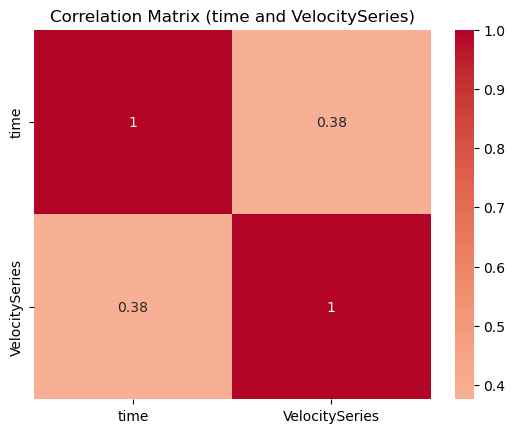

In [15]:
# Calculate the correlation matrix for 'time' and 'VelocitySeries'
correlation_matrix_filtered = data[['time', 'VelocitySeries']].corr()

# Plot the filtered correlation matrix
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (time and VelocitySeries)')
plt.show()

The correlation matrix shows that there is little correlation between the velocity and a given time. This might account for some seasonal fluctuations but likely does not have the granularity to represent the correlation between, for example, summer months and velocity speedup.